# Уравнение Кеплера

Уравнение Кеплера для вычисления орбиты имеет вид: $$ M = E - \varepsilon sinE $$

где M – средняя аномалия, E – эксцентрическая аномалия, $\varepsilon$ – эксцентриситет орбиты. 

Пусть M = 24.851090, $\varepsilon$ = 0.1

1. Импорт библиотек

In [25]:
from scipy.optimize import brentq
from math import sin, cos, sqrt, factorial
import matplotlib.pyplot as plt
from scipy.special import jv

2. Вывод уравнения Кеплера:

$$sqrt(1-e^2)$$
e — эксцентриситет.

Площадь эллипса равна:

$$S=\pi a^2\sqrt{1-e^2}$$
где a — большая полуось. 

Согласно второму закону Кеплера, который гласит, что площадь, заметаемая радиус-вектором небесного тела пропорциональна времени, можно написать:

$$S(t)=\frac{\pi a^2\sqrt{1-e^2}*(t-t_0)}{T}$$
где T — период обращения, t — текущее время, $t_0$ — момент времени прохождения перигелия (ближайшей к Солнцу точки орбиты).

Найдем зависимость площади от положения небесного тела на орбите, то есть от величины радиус-вектора r и истинной аномалии — угла между перигелием и небесным телом, если смотреть с Солнца.

Для этого введем дополнительную переменную — эксцентрическую аномалию E. Направим ось x от Солнца (начала координат), которое находится в одном из фокусов эллипса, в сторону перигелия по линии апсид (прямой, соединяющей перицентр с апоцентром). Создадим также вспомогательную окружность с радиусом, равным большой полуоси эллипса.

Абсцисса небесного тела в точке P будет равна: $x=cos(E)-ae$

Ордината будет, соответственно, равна: $y=asin(E)\sqrt{1-e^2}$

Таким образом, получаем: $x=rcos(v)=acos(E)-e$ ; $y=rsin(v)=asin(E)\sqrt{1-e^2}$

Для вычисления площади S рассмотрим вспомогательные фигуры: сектор окружности P'-O-Per: $S1=\frac{a^2E}{2}$

Сектор эллипса P-O-Per: $S2=S1\sqrt{1-e^2}$

Треугольник O-O'-P: $S3=\frac{1}{2}(yae)=\frac{1}{2}a^2esinE\sqrt{1-e^2}$

Сектор P-O'-Per: $S=S2-S3$

Отсюда, прощадь S равна: $S(t)=\frac{1}{2}a^2\sqrt{1-e^2}(E-esin(E))$

Сравнивая это выражение с выведенным ранее из второго закона Кеплера, получаем: $M(t)=E(t)-esin(E(t))$ , где $M(t)=\frac{2\pi t}{T}$

![Картинка](https://sun9-52.userapi.com/s/v1/if2/Ywa0tpKcoUB3wncL_f3IJ6TpPpcQsrX5EaoRmIR5ua7h6bpbSL0P3D5lHhoNgg-4XT9_8pusGcILa25Gr6rVIYcM.jpg?size=400x400&quality=96&type=album)

3. Построим орбиту:

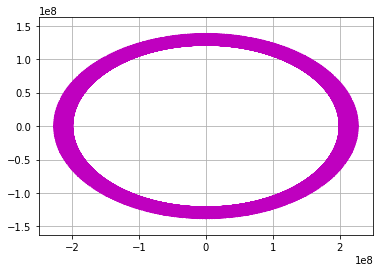

In [24]:
from numpy import*
from matplotlib.pyplot import*
%matplotlib inline
M=24.85109
e=0.1
a=149600000*1.52
N=360
def X(E):
    return a*cos(E)-e
def Y(E):
    return a*sin(E)*sqrt(1-e**0.2)
E=[i for i in arange(0,N,1)]
X=array([X(w) for w in E])
Y=array([Y(w) for w in E])
figure()
axis('equal')
plot (X, Y, "m")
grid(True)
pass

4. С помощью функции scipy.optimize.brentq найдём E.

In [4]:
from scipy import optimize
from math import*
from numpy import*
𝑀=24.851090
e=0.1
def f(E):
    return E-e*sin(E)-M
k=optimize.brentq(f,-40,40)
print(k)

24.820357182542907


5. Вычислим E с помощью формулы $$E = M + 2\sum_{m=1}^\infty \frac{1}{m}J_m(m\varepsilon)sin(mM)$$
где $J_m(x)$ – функция Бесселя 1-го рода порядка m.

In [14]:
m = 5
Eps = 0.1
M = 24.851090
E1 = list()
for i in range(1, m+1):
    E1.append(1/i*jv(i, Eps)*sin(i*M))
E1 = M + 2*sum(E1)
print(E1)

24.8226530882530


6. Найдите E по предыдущей формуле, используя равенство: $$ J_m(m\varepsilon) = \sum_{m=1}^\infty \frac{(-1)^n(m\varepsilon/2)^{2n+m}}{n!(m+n)!} $$

In [19]:
n = 10
m = 5
Eps = 0.1
M = 24.851090
E2 = list()
for i in range(1, m+1):
    Jv = [((-1)**j*((i*Eps)/2)**(2*j+i))/(factorial(j)*factorial(i+j)) for j in range(n)]
    Jv = sum(Jv)
    E2.append(1/i*Jv*sin(i*M))
E2 = M + 2*sum(E2)
print(E2)

24.8203575498136


1. 24.820357182542907
2. 24.820357182542907
3. 24.8203575498136

# Вывод

1) Все 3 способа дали практически идентичный результат(погрешность = 10^(-9))

2) Самый долгий способ - нахождение эксцентрической аномалии при помощи метода последовательных приближений с использованием формулы для функции Бесселя. Остальные два способа работают с примерно одинаковым быстродействием.